In [2]:
# Bibliotecas padrão 
import warnings
import io
import requests
import sys
from collections import Counter

# Manipulação de dados 
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# ====== Configurações ======
warnings.filterwarnings('ignore')


In [29]:
# Carregando o arquivo .pkl para um DataFrame - O datafram está lematizado
df = pd.read_pickle('development_sample.pkl')
df.head(50)

,review_text,overall_rating,recommend_to_a_friend,site_category_lv1,site_category_lv2,review_title,reviewer_state,reviewer_gender,customer_review_text,review_text_preprocessed,customer_review_rating,tokens_list_tmp,review_text_tokenized,review_length,review_text_lemmatized,target
0,Estou contente com a compra entrega rápida o ú...,4,Yes,Informática,Notebook,Bom,RJ,F,Bom Estou contente com a compra entrega rápida...,bom contente compra entrega rápida único probl...,Ótimo,"[bom, estou, contente, com, a, compra, entrega...","[bom, contente, compra, entrega, rápida, único...",112,bom contente compra entregar rápido único prob...,0
1,"Por apenas R$1994.20,eu consegui comprar esse ...",4,Yes,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",SC,M,"Preço imbatível, ótima qualidade Por apenas R$...",preço imbatível ótima qualidade apenas r conse...,Ótimo,"[preço, imbatível, ótima, qualidade, por, apen...","[preço, imbatível, ótima, qualidade, apenas, r...",77,preço imbatível ótimo qualidade apenas elr con...,0
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,4,Yes,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,SP,M,ATENDE TODAS AS EXPECTATIVA. SUPERA EM AGILIDA...,atende todas expectativa supera agilidade prat...,Ótimo,"[atende, todas, as, expectativa, supera, em, a...","[atende, todas, expectativa, supera, agilidade...",213,atender todo expectativa superar agilidader pr...,0
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,4,Yes,Brinquedos,Veículos de Brinquedo,presente mais que desejado,SP,F,presente mais que desejado MEU FILHO AMOU! PAR...,presente desejado filho amou parece verdade ta...,Ótimo,"[presente, mais, que, desejado, meu, filho, am...","[presente, desejado, filho, amou, parece, verd...",63,presente desejar filho amar parecer verdade ta...,0
4,"A entrega foi no prazo, as americanas estão de...",5,Yes,TV e Home Theater,TV,"Sem duvidas, excelente",MG,M,"Sem duvidas, excelente A entrega foi no prazo,...",duvidas excelente entrega prazo americanas par...,Excelente,"[sem, duvidas, excelente, a, entrega, foi, no,...","[duvidas, excelente, entrega, prazo, americana...",157,duvir excelente entregar prazo americana parab...,0
5,"Excelente produto, por fora em material acríli...",5,Yes,Utilidades Domésticas,"Copos, Taças e Canecas",Produto imperdível,PA,M,"Produto imperdível Excelente produto, por fora...",produto imperdível excelente produto material ...,Excelente,"[produto, imperdível, excelente, produto, por,...","[produto, imperdível, excelente, produto, mate...",157,produto imperdível excelente produto material ...,0
7,Produto excelente qualidade boa câmera desenvo...,4,Yes,Celulares e Smartphones,Smartphone,Gostei bastante do produto,GO,M,Gostei bastante do produto Produto excelente q...,gostei bastante produto produto excelente qual...,Ótimo,"[gostei, bastante, do, produto, produto, excel...","[gostei, bastante, produto, produto, excelente...",94,gostar bastante produto produto excelente qual...,0
8,O barulho e minimo e o vento é bem forte na ve...,5,Yes,Casa e Construção,Climatização,Gostei do produto,SP,M,Gostei do produto O barulho e minimo e o vento...,gostei produto barulho minimo vento bem forte ...,Excelente,"[gostei, do, produto, o, barulho, e, minimo, e...","[gostei, produto, barulho, minimo, vento, bem,...",56,gostar produto barulho minimo vento bem forte ...,0
9,MEU PRODUTO NAO FOI ENTREGUE E A AMERICANAS ES...,1,No,Casa e Construção,Iluminação,NÃO RECEBI O PRODUTO,RJ,M,NÃO RECEBI O PRODUTO MEU PRODUTO NAO FOI ENTRE...,não recebi produto produto nao entregue americ...,Ruim,"[não, recebi, o, produto, meu, produto, nao, f...","[não, recebi, produto, produto, nao, entregue,...",76,não recebi produto produto nao entregar americ...,1
11,"Produto maravilhoso! Não é barulhento, fácil m...",5,Yes,Eletroportáteis,Aspirador e Vassoura Elétrica,Maravilhoso!!!,RJ,F,Maravilhoso!!! Produto maravilhoso! Não é baru...,maravilhoso produto maravilhoso não barulhento...,Excelente,"[m

Aplica a análise de sentimento

In [ ]:
#PATH
sys.path.append('./sentianalyst') 

from core import SentimentIntensityAnalyzer

# Abrindo o analisador
sia = SentimentIntensityAnalyzer()

def analise_sentimento(texto):    
    # Calcular o score de sentimento (assumindo float)
    compound = sia.polarity_scores(texto)
    if compound > 0.5:
        sentimento = 'positivo'  
    else:
        sentimento = 'negativo'  

    return {
        'score': compound,
        'sentimento': sentimento
    }

In [3]:
df = pd.read_pickle('development_sample_result.pkl')

Visualizando os resultados - São criadas duas novas colunas com os resultados da análise de sentimento.

In [ ]:
# Aplicar a função de análise de sentimento no dataset
df['resultado_simbólico'] = df['review_text_lemmatized'].apply(analise_sentimento)
df['sentimento_simbólico'] = df['resultado_simbólico'].apply(lambda x: x['sentimento'])
df['score_simbólico'] = df['resultado_simbólico'].apply(lambda x: x['score'])

In [4]:
# Visualizando resultados
df[['review_text_lemmatized', 'sentimento_simbólico','target','score_simbólico']].round(2).head(100)

,review_text_lemmatized,sentimento_simbólico,target,score_simbólico
0,bom contente compra entregar rápido único prob...,positivo,1,0.60
1,preço imbatível ótimo qualidade apenas elr con...,positivo,1,1.50
2,atender todo expectativa superar agilidader pr...,positivo,1,1.39
3,presente desejar filho amar parecer verdade ta...,positivo,1,3.20
4,duvir excelente entregar prazo americana parab...,positivo,1,13.19
...,...,...,...,...
103,excelente excelente produto esquentar dar form...,positivo,1,10.30
104,achar muito básico gostar pouco aparência prop...,positivo,0,1.50
105,bom produto bom produto feliz semana cheio amo...,positivo,1,11.90
106,excelente produto adorar recomer todo perfeito...,positivo,1,13.09


Analisando as métricas do modelo.
Foi utilizado o *VADER* - é uma ferramenta de análise de sentimento baseada em regras, projetada especificamente para textos em linguagem natural.

In [9]:
y_true_filtered = df['target']
y_pred_filtered = df['sentimento_simbólico'].map({'positivo': 1, 'negativo': 0})
y_score_filtered = df['score_simbólico']

Resultados para VADER Sentiment Analysis:
              precision    recall  f1-score   support

Negative (0)       0.63      0.75      0.69     30759
Positive (1)       0.91      0.85      0.88     88997

    accuracy                           0.82    119756
   macro avg       0.77      0.80      0.78    119756
weighted avg       0.84      0.82      0.83    119756



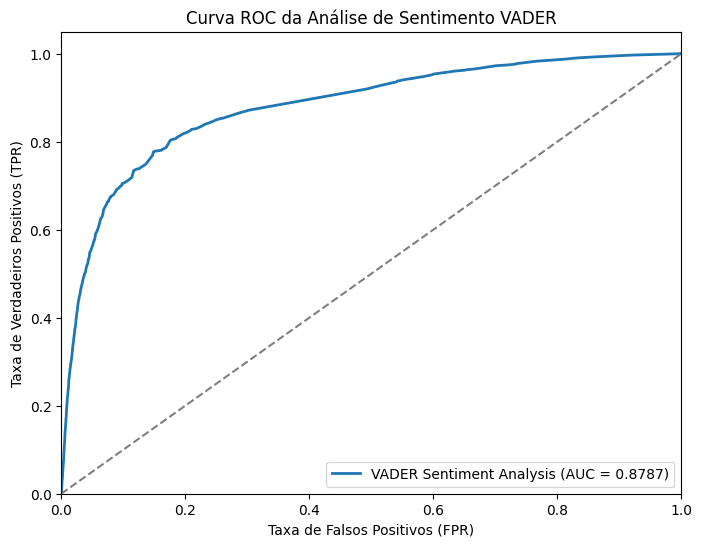

AUC Scores:
VADER Sentiment Analysis: 0.8787


In [10]:
# Inicializar listas para armazenar resultados
roc_auc_scores = {}
plt.figure(figsize=(8, 6))

# Avaliar o "modelo" VADER
model_name = "VADER Sentiment Analysis"

# Gera relatório de classificação
print(f"Resultados para {model_name}:")
print(classification_report(y_true_filtered, y_pred_filtered, target_names=['Negative (0)', 'Positive (1)']))

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_true_filtered, y_score_filtered, pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc_scores[model_name] = roc_auc

plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.4f})")

# Configurações do gráfico
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal (classificador aleatório)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC da Análise de Sentimento VADER')
plt.legend(loc='lower right')
plt.show()

# Exibir AUC score
print("AUC Scores:")
for model_name, auc_score in roc_auc_scores.items():
    print(f"{model_name}: {auc_score:.4f}")

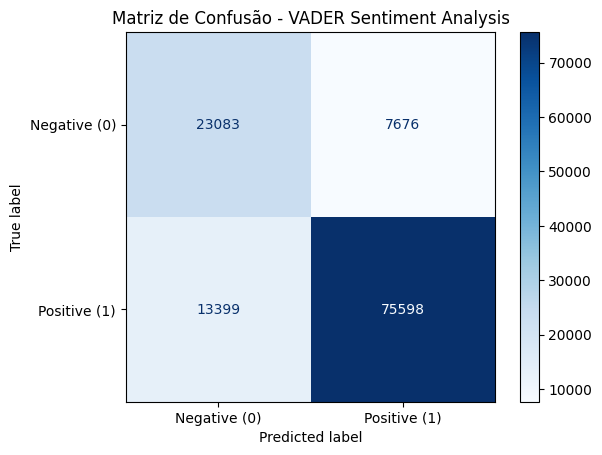

In [7]:
# Matriz de confusão
cm = confusion_matrix(y_true_filtered, y_pred_filtered)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative (0)', 'Positive (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - VADER Sentiment Analysis")
plt.show()